# Review

[Dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv( 'https://archive.ics.uci.edu/ml/''machine-learning-databases''/breast-cancer-wisconsin/wdbc.data', header=None)

In [3]:
X = df.loc[:,2: ]

In [4]:
X.head()

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
y = df.loc[:, 1]

In [7]:
le = LabelEncoder()

y = le.fit_transform(y)

In [8]:
import numpy as np
np.unique(y, return_counts = True)

(array([0, 1]), array([357, 212]))

In [9]:
212/(357+212)

0.37258347978910367

In [10]:
from sklearn.model_selection import train_test_split


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify = y, random_state = 1 )

# Logistic Regression

## No regularization

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
lr = LogisticRegression(penalty = 'none', max_iter=10000, solver= 'saga' )

In [14]:
from sklearn.model_selection import cross_validate

In [15]:
cv_fivefold = cross_validate(estimator = lr, 
                             X=X_train,
                             y=y_train,
                             cv =5, 
                             return_train_score= True,
                             return_estimator= True )

In [16]:
cv_fivefold

{'fit_time': array([0.28786898, 0.28210878, 0.30018497, 0.27381706, 0.30137801]),
 'score_time': array([0.00174475, 0.00143504, 0.00154305, 0.00157809, 0.00158095]),
 'estimator': (LogisticRegression(max_iter=10000, penalty='none', solver='saga'),
  LogisticRegression(max_iter=10000, penalty='none', solver='saga'),
  LogisticRegression(max_iter=10000, penalty='none', solver='saga'),
  LogisticRegression(max_iter=10000, penalty='none', solver='saga'),
  LogisticRegression(max_iter=10000, penalty='none', solver='saga')),
 'test_score': array([0.9010989 , 0.95604396, 0.91208791, 0.86813187, 0.92307692]),
 'train_score': array([0.91483516, 0.90934066, 0.91758242, 0.93131868, 0.91483516])}

In [17]:
results = {'logreg_no_penalty': [cv_fivefold['test_score'], cv_fivefold['train_score']]}

In [18]:
results['logreg_no_penalty']

[array([0.9010989 , 0.95604396, 0.91208791, 0.86813187, 0.92307692]),
 array([0.91483516, 0.90934066, 0.91758242, 0.93131868, 0.91483516])]

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [21]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)
score = lr.score(X_train, y_train)
cm = confusion_matrix(y_train, y_pred)

In [22]:
recall_score(y_train, y_pred)

0.8470588235294118

In [23]:
import matplotlib.pyplot as plt

In [24]:
import utils



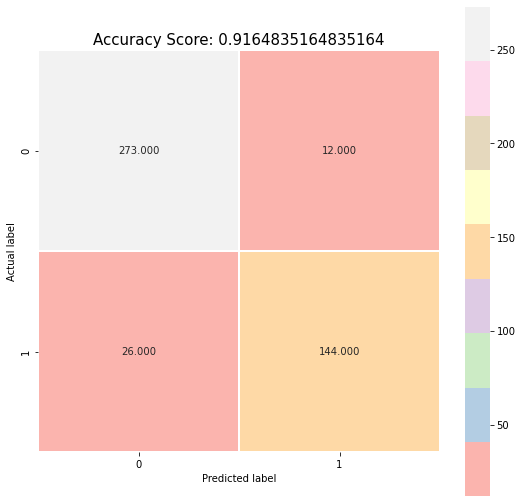

In [25]:
utils.plot_confusion_matrix(cm, score)

In [106]:
results['logreg_no_penalty'].append(cm)

In [107]:
results

{'logreg_no_penalty': [array([0.9010989 , 0.95604396, 0.91208791, 0.86813187, 0.92307692]),
  array([0.91483516, 0.90934066, 0.91758242, 0.93131868, 0.91483516]),
  array([[273,  12],
         [ 26, 144]])]}

## Logistic Regression with Regularization

In [108]:
from sklearn.model_selection import GridSearchCV

In [109]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

In [275]:
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

In [111]:
grid = {'C': [0.1, 1, 10, 100, 1000], 'penalty' :['l1', 'l2']}

In [286]:
lr = LogisticRegression(max_iter= 10000, solver = 'saga')
clf = GridSearchCV(estimator = lr, param_grid= grid, n_jobs = -1, verbose= 2, cv=5, return_train_score=True)

In [282]:
clf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.8s finished


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000, solver='saga'),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='roc_auc', verbose=2)

In [283]:
pd.DataFrame(clf.cv_results_).sort_values('mean_test_score', ascending=False).T

,3,1,2,5,4,0,7,9,6,8
mean_fit_time,0.0830776,0.0233022,0.705327,0.336485,0.719033,0.282084,0.733404,0.645375,1.049,0.940879
std_fit_time,0.0144929,0.00408378,0.102014,0.0511751,0.0872182,0.14032,0.0993159,0.0560117,0.122111,0.0896352
mean_score_time,0.00125465,0.00219736,0.00148306,0.0012413,0.00123935,0.00186939,0.00127044,0.000923061,0.00130119,0.000888968
std_score_time,1.07649e-05,0.000480634,0.000235478,1.99319e-05,0.000224686,0.000234346,1.90792e-05,6.93257e-05,8.72251e-05,5.9265e-05
param_C,1,0.1,1,10,10,0.1,100,1000,100,1000
param_penalty,l2,l2,l1,l2,l1,l1,l2,l2,l1,l1
params,"{'C': 1, 'penalty': 'l2'}","{'C': 0.1, 'penalty': 'l2'}","{'C': 1, 'penalty': 'l1'}","{'C': 10, 'penalty': 'l2'}","{'C': 10, 'penalty': 'l1'}","{'C': 0.1, 'penalty': 'l1'}","{'C': 100, 'penalty': 'l2'}","{'C': 1000, 'penalty': 'l2'}","{'C': 100, 'penalty': 'l1'}","{'C': 1000, 'penalty': 'l1'}"
split0_test_score,0.998968,0.99742,0.992776,0.998452,0.996388,0.979876,0.995356,0.995356,0.995356,0.995356
split1_test_score,0.998968,0.998968,0.998968,0.996904,0.996388,0.999484,0.990712,0.98968,0.98968,0.98968
split2_test_score,0.975748,0.971104,0.975748,0.975232,0.975748,0.967492,0.975232,0.975232,0.974716,0.974716


In [284]:
print("best parameters  are: ", clf.best_params_)

best parameters  are:  {'C': 1, 'penalty': 'l2'}


In [285]:
lr = clf.best_estimator_
cv_fivefold = cross_validate(estimator = lr, 
                             X=X_train_scaled,
                             y=y_train,
                             cv =5, 
                             return_train_score= True,
                             return_estimator= True )

In [168]:
test_mean = cv_fivefold['test_score'].mean()

test_std = cv_fivefold['test_score'].std()


print('best regularized test score: %.3f  +/- %.3f'%(test_mean, test_std))

best regularized test score: 0.978  +/- 0.016


In [169]:
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_train_scaled)
score = lr.score(X_train_scaled, y_train)
cm = confusion_matrix(y_train, y_pred)

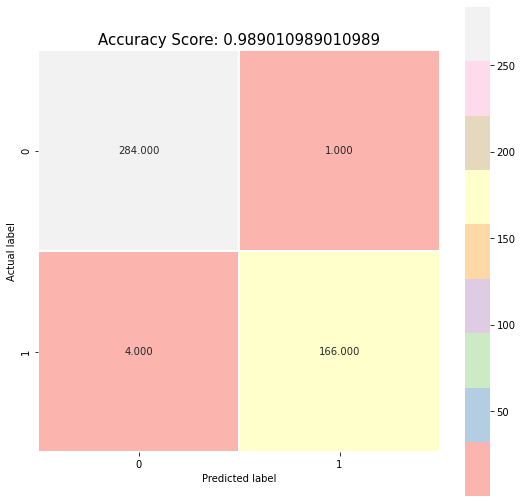

In [170]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('logs/regularized_log_reg.png')
plt.draw()

# Tree Based Models

## Decision Trees

In [173]:
from sklearn.tree import DecisionTreeClassifier

In [180]:
dt_clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 3)

In [181]:
from sklearn.model_selection import cross_validate

In [287]:
cv_fivefold = cross_validate(estimator = dt_clf, X=X_train, y=y_train, cv =5, return_train_score= True, return_estimator= True )

In [279]:
cv_fivefold

{'fit_time': array([0.00575471, 0.00526094, 0.00503206, 0.00528193, 0.00514579]),
 'score_time': array([0.00341511, 0.00278401, 0.00297594, 0.00275922, 0.00260711]),
 'estimator': (DecisionTreeClassifier(max_depth=3),
  DecisionTreeClassifier(max_depth=3),
  DecisionTreeClassifier(max_depth=3),
  DecisionTreeClassifier(max_depth=3),
  DecisionTreeClassifier(max_depth=3)),
 'test_score': array([0.95201238, 0.96517028, 0.89112487, 0.93885449, 0.98606811]),
 'train_score': array([0.99582366, 0.98127902, 0.99340493, 0.9780863 , 0.98869647])}

In [280]:
test_mean = cv_fivefold['test_score'].mean()

test_std = cv_fivefold['test_score'].std()


print('best decision tree test score: %.3f  +/- %.3f'%(test_mean, test_std))

best decision tree test score: 0.947  +/- 0.032


In [185]:
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_train)
score = dt_clf.score(X_train, y_train)
cm = confusion_matrix(y_train, y_pred)

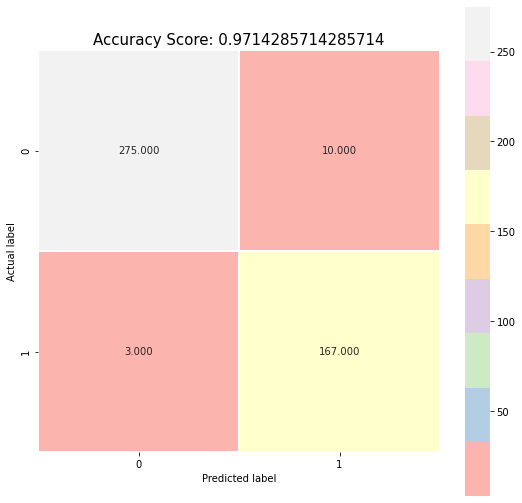

In [186]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('logs/decision_tree_3depth.png')
plt.draw()

## Random Forests

### Bootstrapping

<img src= "images/bootstrap1.png" style="height:450px">


### Bagging: Bootstrap Aggregation


__Core idea__

- Decision trees have high variance.

- We know averaging can reduce the variance. (Central Limit Theorem?)

- Why bootstrap though?

    - Averaging the same numbers yields the same number: [2,2,2,2]  --> avg: 2
    
    - You want each tree to learn a little bit differently so that averaging make sense.

__A little bit more details__


We will use this idea calculate $$ \hat{f}^{1}(x), \cdots, \hat{f}^{B}(x)$$ where each $\hat{f}^{i}$ represents a decision tree fitted to the bootstrapped data.

Then we will make a prediction by: 

$$ \hat{f}_{\text{avg}}(x) = \frac{1}{B}\sum_{b=1}^{B} \hat{f}^{b}(x)$$

Note that this is for regression and for the classification we can get majority vote.

[sklearn averages over probabilities not majority vote](https://scikit-learn.org/stable/modules/ensemble.html#forest)


__Problem__ We still have some problem with this approach and random forests will address this problem. Can you see the issue?

- If we have a strong predictor then this will dominate in each tree.

Hint: Correlated trees

- Random forests adds some randomness into the procedure to make each tree uncorrolated.

### Implementation of Random Forest

In [218]:
from sklearn.ensemble import RandomForestClassifier

In [258]:
rf = RandomForestClassifier(n_estimators= 300, min_impurity_decrease= 0.001 ,random_state= 2, oob_score= True, n_jobs= -1)

In [259]:
rf.fit(X_train, y_train)

RandomForestClassifier(min_impurity_decrease=0.001, n_estimators=300, n_jobs=-1,
                       oob_score=True, random_state=2)

In [260]:
rf.oob_score_

0.9648351648351648

In [261]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)
score = rf.score(X_train, y_train)
cm = confusion_matrix(y_train, y_pred)

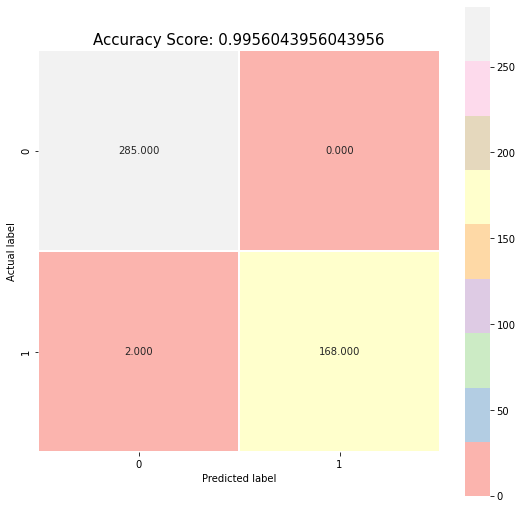

In [262]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('logs/random_forest.png')
plt.draw()

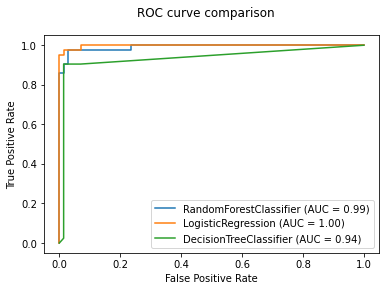

In [274]:
import matplotlib.pyplot as plt  # doctest: +SKIP
from sklearn import datasets, metrics, model_selection, svm

rf.fit(X_train, y_train)

rfc_disp = metrics.plot_roc_curve(rf, X_test, y_test)  # doctest: +SKIP
log_disp = metrics.plot_roc_curve(lr, X_test_scaled, y_test, ax = rfc_disp.ax_)  # doctest: +SKIP
dct_disp = metrics.plot_roc_curve(dt_clf, X_test, y_test, ax = rfc_disp.ax_)  # doctest: +SKIP

rfc_disp.figure_.suptitle("ROC curve comparison")
plt.show()  

### Extra Material 

- [Sklearn averages probabilities in RF implementation](https://scikit-learn.org/stable/modules/ensemble.html#forest)

- [On the variance](https://newonlinecourses.science.psu.edu/stat414/node/167/)

- [Do RF immune to overfitting?](https://en.wikipedia.org/wiki/Talk%3ARandom_forest)

- [Tricky stuff with respect to feature importance](http://rnowling.github.io/machine/learning/2015/08/10/random-forest-bias.html)

- [An interesting implementation of feature importance](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances_faces.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-faces-py)

- [Different Ensemble Methods in sklearn](https://scikit-learn.org/stable/modules/ensemble.html#forest)

- [ISLR - section 8.2](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf)

- [Another library for RF: H2o](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/drf.html)